In [15]:
from scipy.io import loadmat
import numpy as np
import json
import matplotlib.pyplot as plt

Problem1Data = loadmat("data3.mat")
Data = Problem1Data['data'].tolist()

HyperParameters = {
    "LearningRate" : 1,
    "MaximumIterations" : 50000,
}

XData = []
YData = []

for values in range(len(Data)):
    TempArray = []
    TempArray.append(Data[values][0])
    TempArray.append(Data[values][1])
    TempArray.append(1)
    YData.append([Data[values][2]])
    XData.append(TempArray)

Data = np.array(Data)
XData = np.array(XData)
YData = np.array(YData)

In [16]:
Sample, Feature = Data.shape
MaximumIterations = HyperParameters['MaximumIterations']
LearningRate = HyperParameters['LearningRate']
Weights = np.random.random_sample((Feature, 1))
ErrorList = []
RiskList = []
Iterations = 0

while(Iterations < MaximumIterations):
    RandomInteger = np.random.randint(Sample)
    Output = XData[RandomInteger].reshape((1,3)).dot(Weights)
    Sign = np.multiply(YData[RandomInteger], Output)
    if(Sign[0][0] >= 0):
        StepValue = 1
    elif(Sign[0][0] < 0):
        StepValue = -1

    if(StepValue == -1):
        Weights += LearningRate * XData[RandomInteger].reshape((3,1)).dot(YData[RandomInteger].reshape((1,1)))
        Prediction = XData.dot(Weights)
        
        Counter = 0
        StepPrediction = []
        for values in range(len(Prediction)):
            if(Prediction[values][0] >= 0):
                StepPrediction.append([1])
            elif(Prediction[values][0] < 0):
                StepPrediction.append([-1])
        
        for values in range(len(StepPrediction)):
            if(StepPrediction[values][0] != YData[values][0]):
                Counter += 1
        
        Error = float(Counter) / Sample
        ErrorList.append(Error)

        Multiply = np.multiply(-YData, Prediction)
        Risk = []
        for values in range(len(Multiply)):
            if(Multiply[values][0] >= 0):
                Risk.append([1])
            elif(Multiply[values][0] < 0):
                Risk.append([0])
        
        SumRisk = float(np.sum(Risk)) / Sample
        RiskList.append(SumRisk)

        Iterations += 1
        if(ErrorList[-1] == 0):
            break

print("Iterations : {}".format(Iterations))
print("Least Error : {}".format(min(ErrorList)))
print("Least Risk : {}".format(min(RiskList)))
print(json.dumps(ErrorList, indent=3))

Iterations : 687
Least Error : 0.0
Least Risk : 0.0
[
   0.495,
   0.5,
   0.49,
   0.5,
   0.485,
   0.5,
   0.35,
   0.5,
   0.5,
   0.5,
   0.5,
   0.425,
   0.5,
   0.5,
   0.5,
   0.45,
   0.5,
   0.46,
   0.5,
   0.365,
   0.5,
   0.345,
   0.5,
   0.305,
   0.5,
   0.365,
   0.5,
   0.385,
   0.5,
   0.46,
   0.5,
   0.46,
   0.35,
   0.445,
   0.5,
   0.49,
   0.39,
   0.475,
   0.225,
   0.48,
   0.225,
   0.48,
   0.26,
   0.46,
   0.385,
   0.35,
   0.5,
   0.29,
   0.5,
   0.365,
   0.5,
   0.405,
   0.32,
   0.355,
   0.375,
   0.355,
   0.49,
   0.35,
   0.5,
   0.35,
   0.355,
   0.345,
   0.5,
   0.27,
   0.5,
   0.27,
   0.5,
   0.23,
   0.5,
   0.3,
   0.38,
   0.31,
   0.5,
   0.26,
   0.5,
   0.255,
   0.49,
   0.27,
   0.38,
   0.31,
   0.415,
   0.285,
   0.475,
   0.285,
   0.375,
   0.26,
   0.375,
   0.27,
   0.375,
   0.29,
   0.335,
   0.31,
   0.235,
   0.32,
   0.3,
   0.32,
   0.3,
   0.31,
   0.235,
   0.31,
   0.325,
   0.24,
   0.38,
   0.265,
   0.375,

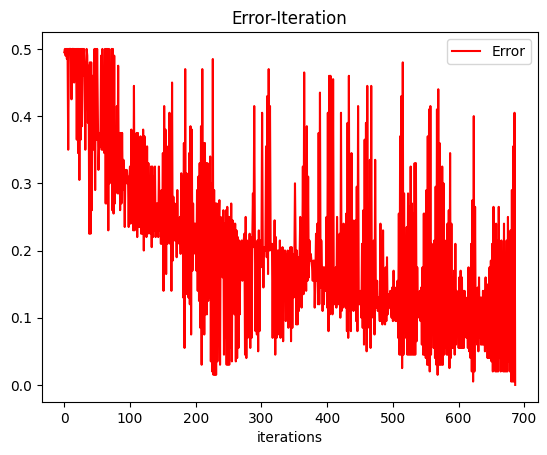

In [21]:
plt.figure(1)
plt.plot(range(Iterations), ErrorList,'r-',label='Error')
plt.xlabel('iterations')
plt.title('Error-Iteration')
plt.legend()
plt.show()

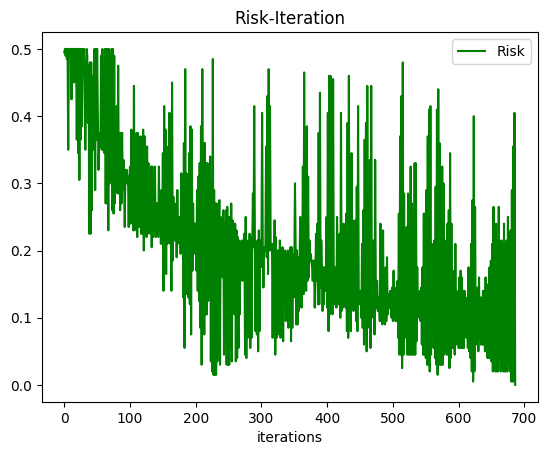

In [22]:
plt.figure(1)
plt.plot(range(Iterations), RiskList, 'g-',label='Risk')
plt.xlabel('iterations')
plt.title('Risk-Iteration')
plt.legend()
plt.show()

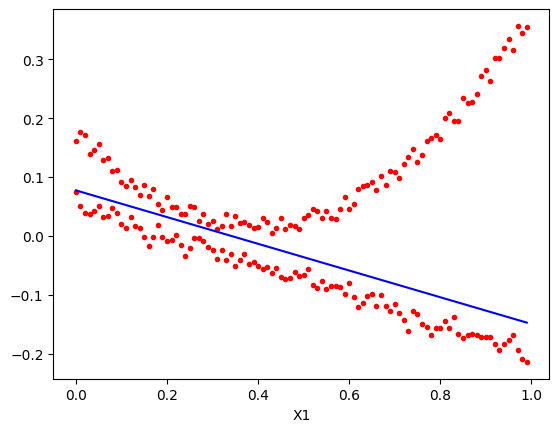

In [20]:
plt.figure(0)
for i in range(Sample):
    plt.plot(XData[i, 0], XData[i, 1], 'r.')
min_x = min(XData[:, 0])
max_x = max(XData[:, 0])
y_min_x = float(-Weights[2] - Weights[0] * min_x) / Weights[1]
y_max_x = float(-Weights[2] - Weights[0] * max_x) / Weights[1]
plt.plot([min_x, max_x], [y_min_x, y_max_x], '-b')
plt.xlabel('X1');